                                             Team No: 6 - Fashion Recommendation System using Python : DATA SCIENCE PROJECT         

Ch 1:Source

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Myntra kurtis.csv")
print("# HEAD : TOP 10 RECORDS")
print(data.head(10)) #Top 10 records 

# HEAD : TOP 10 RECORDS
       Brand Name                                        Product URL  \
0  Rain & Rainbow  https://www.myntra.com/kurtis/rain--rainbow/ra...   
1        HERE&NOW  https://www.myntra.com/kurtis/herenow/herenow-...   
2           Anouk  https://www.myntra.com/kurtis/anouk/anouk-wome...   
3       Anubhutee  https://www.myntra.com/kurtis/anubhutee/anubhu...   
4           GERUA  https://www.myntra.com/kurtis/gerua/gerua-wome...   
5  Rain & Rainbow  https://www.myntra.com/kurtis/rain--rainbow/ra...   
6    ZNX Clothing  https://www.myntra.com/kurtis/znx-clothing/znx...   
7        HERE&NOW  https://www.myntra.com/kurtis/herenow/herenow-...   
8       MissKurti  https://www.myntra.com/kurtis/misskurti/missku...   
9           Anouk  https://www.myntra.com/kurtis/anouk/anouk-navy...   

                                               Image  Product Ratings  \
0  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   
1  https://assets.myntassets.com/dpr_

In [2]:
#Last 10 records 
print("# TAIL : LAST 10 RECORDS")
print(data.tail(10))
data.describe()

# TAIL : LAST 10 RECORDS
        Brand Name                                        Product URL Image  \
589          Azira  https://www.myntra.com/kurtis/azira/-azira-wom...   NaN   
590         KALINI  https://www.myntra.com/kurtis/kalini/kalini-pi...   NaN   
591        Sangria  https://www.myntra.com/kurtis/sangria/sangria-...   NaN   
592        Campana  https://www.myntra.com/kurtis/campana/campana-...   NaN   
593       FAWOMENT  https://www.myntra.com/kurtis/fawoment/fawomen...   NaN   
594       FAWOMENT  https://www.myntra.com/kurtis/fawoment/fawomen...   NaN   
595       Fabindia  https://www.myntra.com/kurtis/fabindia/fabindi...   NaN   
596  all about you  https://www.myntra.com/kurtis/all-about-you/al...   NaN   
597        MALHAAR  https://www.myntra.com/kurtis/malhaar/malhaar-...   NaN   
598         Pistaa  https://www.myntra.com/kurtis/pistaa/pistaa-ye...   NaN   

     Product Ratings  Number of ratings                          Product Info  \
589              NaN    

,Product Ratings,Number of ratings,Selling Price,Price
count,401.000000,599.000000,525.000000,525.000000
mean,4.191771,79.262104,779.695238,1865.729524
std,0.379549,232.759927,530.983362,772.987426
min,1.500000,0.000000,274.000000,400.000000
25%,4.000000,0.000000,539.000000,1499.000000
50%,4.200000,11.000000,659.000000,1739.000000
75%,4.400000,42.000000,809.000000,1999.000000
max,5.000000,2800.000000,4720.000000,5900.000000


Ch 2: DATASET EXAMINATION & PRE - PROCESSING
        

Metadata related to dataset 

In [3]:
#information for the dataset
print("# INFORMATION FOR THE DATASET")
data.info()

print("\n# LIST OF ATTRIBUTES")
attributes = data.columns
print("ATTRIBUTES: \n",attributes)

#Find Quantitative and Qualitative attributes
quantitative = data.select_dtypes(include=['number']).columns.to_list()
qualitative = data.select_dtypes(exclude=['number']).columns.to_list()

print("\nQuantitative Data filed: ",quantitative)
print("Qualitative Data filed: ",qualitative,"\n")

#Types of measurement scale
print("Measurement Scale\n")
for column in data.columns:
    data_type = data[column].dtype
    
    if data_type == 'object':
        if data[column].str.isnumeric().all():
            print(f"{column}: Ratio or Interval")
        else:
            print(f"{column}: Nominal")
    
    else:
        if data[column].nunique() < len(data) / 5:
            print(f"{column}: Ordinal")
        else:
             print(f"{column}: Ratio or Interval")


#Numbers of records
num_records = len(data)
print("\nNumber of records:", num_records)
print("Number of rows and colums:", data.shape)


# INFORMATION FOR THE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand Name         599 non-null    object 
 1   Product URL        599 non-null    object 
 2   Image              132 non-null    object 
 3   Product Ratings    401 non-null    float64
 4   Number of ratings  599 non-null    int64  
 5   Product Info       599 non-null    object 
 6   Selling Price      525 non-null    float64
 7   Price              525 non-null    float64
 8   Discount           525 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 42.2+ KB

# LIST OF ATTRIBUTES
ATTRIBUTES: 
 Index(['Brand Name', 'Product URL', 'Image', 'Product Ratings',
       'Number of ratings', 'Product Info', 'Selling Price', 'Price',
       'Discount'],
      dtype='object')

Quantitative Data filed:  ['Product Ratings', 'Number of ratin

Identification of need for data preprocessing

In [4]:
#Duplication data
print("Duplication Data\n",data.duplicated())

#Missing value
null_counts = data.isnull().sum()
print("\nMissing values\n",null_counts)


#Fill null values in 'Image' column
data['Image'].fillna('No Image', inplace=True)

#Fill null values in 'Product Ratings' column
mean_product_ratings = data['Product Ratings'].mean()
data['Product Ratings'].fillna(mean_product_ratings, inplace=True)

#Fill null values in 'Selling Price', 'Price' and 'Discount' column
data['Selling Price'].fillna(0, inplace=True)
data['Price'].fillna(0, inplace=True)
data['Discount'].fillna(0, inplace=True)

check_null_counts = data.isnull().sum()
print("\nFill null values in after dataset\n",check_null_counts)


Duplication Data
 0      False
1      False
2      False
3      False
4      False
       ...  
594    False
595    False
596    False
597    False
598    False
Length: 599, dtype: bool

Missing values
 Brand Name             0
Product URL            0
Image                467
Product Ratings      198
Number of ratings      0
Product Info           0
Selling Price         74
Price                 74
Discount              74
dtype: int64

Fill null values in after dataset
 Brand Name           0
Product URL          0
Image                0
Product Ratings      0
Number of ratings    0
Product Info         0
Selling Price        0
Price                0
Discount             0
dtype: int64


Ch 3: Techniques Selection for Data Visualization

Descriptive statistics

In [5]:
#Describe
data.describe()

,Product Ratings,Number of ratings,Selling Price,Price
count,599.000000,599.000000,599.000000,599.000000
mean,4.191771,79.262104,683.372287,1635.238731
std,0.310418,232.759927,559.453780,949.267086
min,1.500000,0.000000,0.000000,0.000000
25%,4.100000,0.000000,486.000000,1299.000000
50%,4.191771,11.000000,624.000000,1695.000000
75%,4.300000,42.000000,773.500000,1999.000000
max,5.000000,2800.000000,4720.000000,5900.000000


Data Visualization

1. Histogram

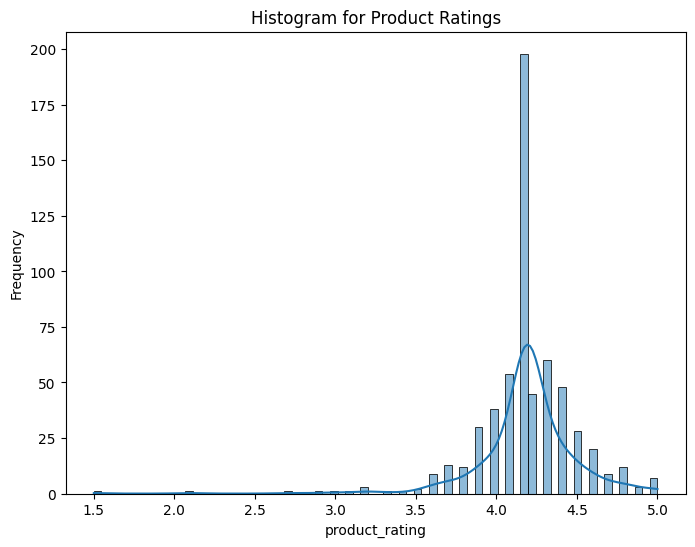

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Histogram for Product Ratings
plt.figure(figsize=(8,6))
sns.histplot(data['Product Ratings'],kde=True)
plt.title('Histogram for Product Ratings')
plt.xlabel('product_rating')
plt.ylabel('Frequency')
plt.show()

2. Boxplot

    Discount  Discount_Values
0  (40% OFF)               40
1  (60% OFF)               60
2  (65% OFF)               65
3  (70% OFF)               70
4  (70% OFF)               70


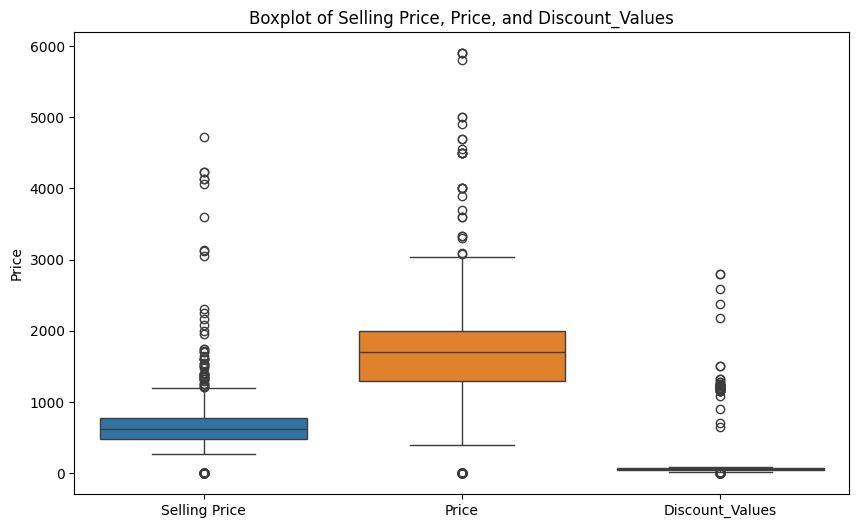

In [7]:
import re
discount_values = []
for value in data['Discount']:
    # Use regular expression to find numeric values
    match = re.search(r'\d+', str(value))
    if match:
        discount_values.append(int(match.group()))
    else:
        discount_values.append(None) # If no numeric value found, store None
# Store the extracted values in a new column
data['Discount_Values'] = discount_values
# Print the first few rows to verify the new column
print(data[['Discount', 'Discount_Values']].head())
#
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Selling Price', 'Price', 'Discount_Values']])
plt.title('Boxplot of Selling Price, Price, and Discount_Values')
plt.ylabel('Price')
plt.xticks(ticks=[0, 1, 2], labels=['Selling Price', 'Price',
'Discount_Values'])
plt.show()

3. Line plot chart

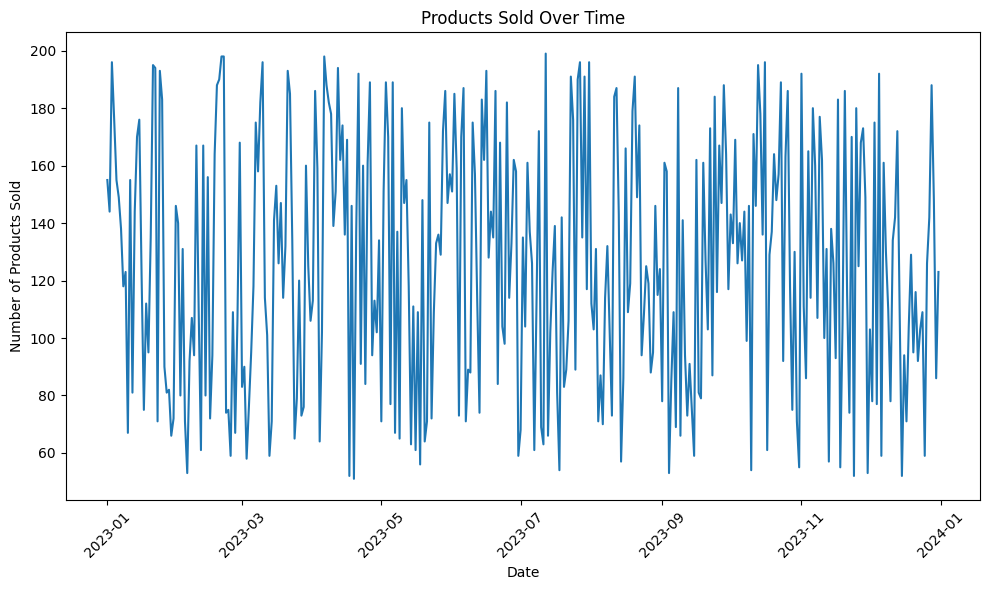

In [8]:
import numpy as np
from datetime import datetime, timedelta


start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
num_days = (end_date - start_date).days + 1

dates = [start_date + timedelta(days=i) for i in range(num_days)]
products_sold = np.random.randint(50, 200, num_days) 

time_series_data = pd.DataFrame({'Date': dates, 'Products Sold': products_sold})

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Products Sold', data=time_series_data)
plt.title('Products Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. Scatter Plot

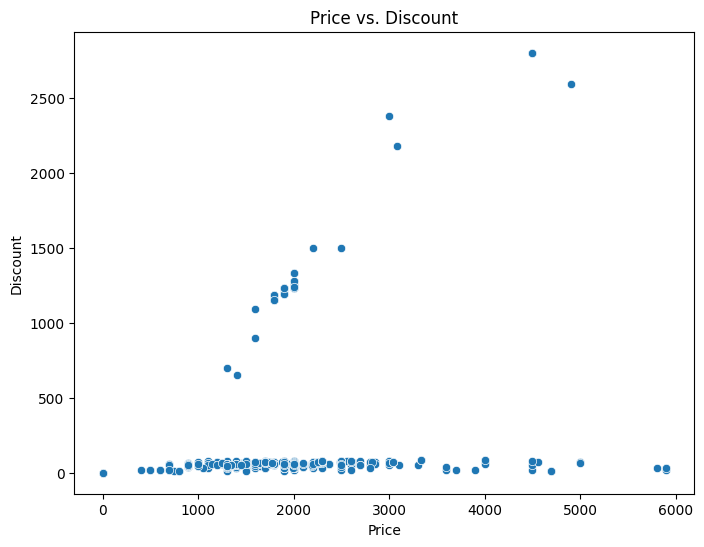

In [9]:
#Price and discount scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Discount_Values', data=data)
plt.title('Price vs. Discount')
plt.xlabel('Price')
plt.ylabel('Discount')
plt.show()

5. Pair plot

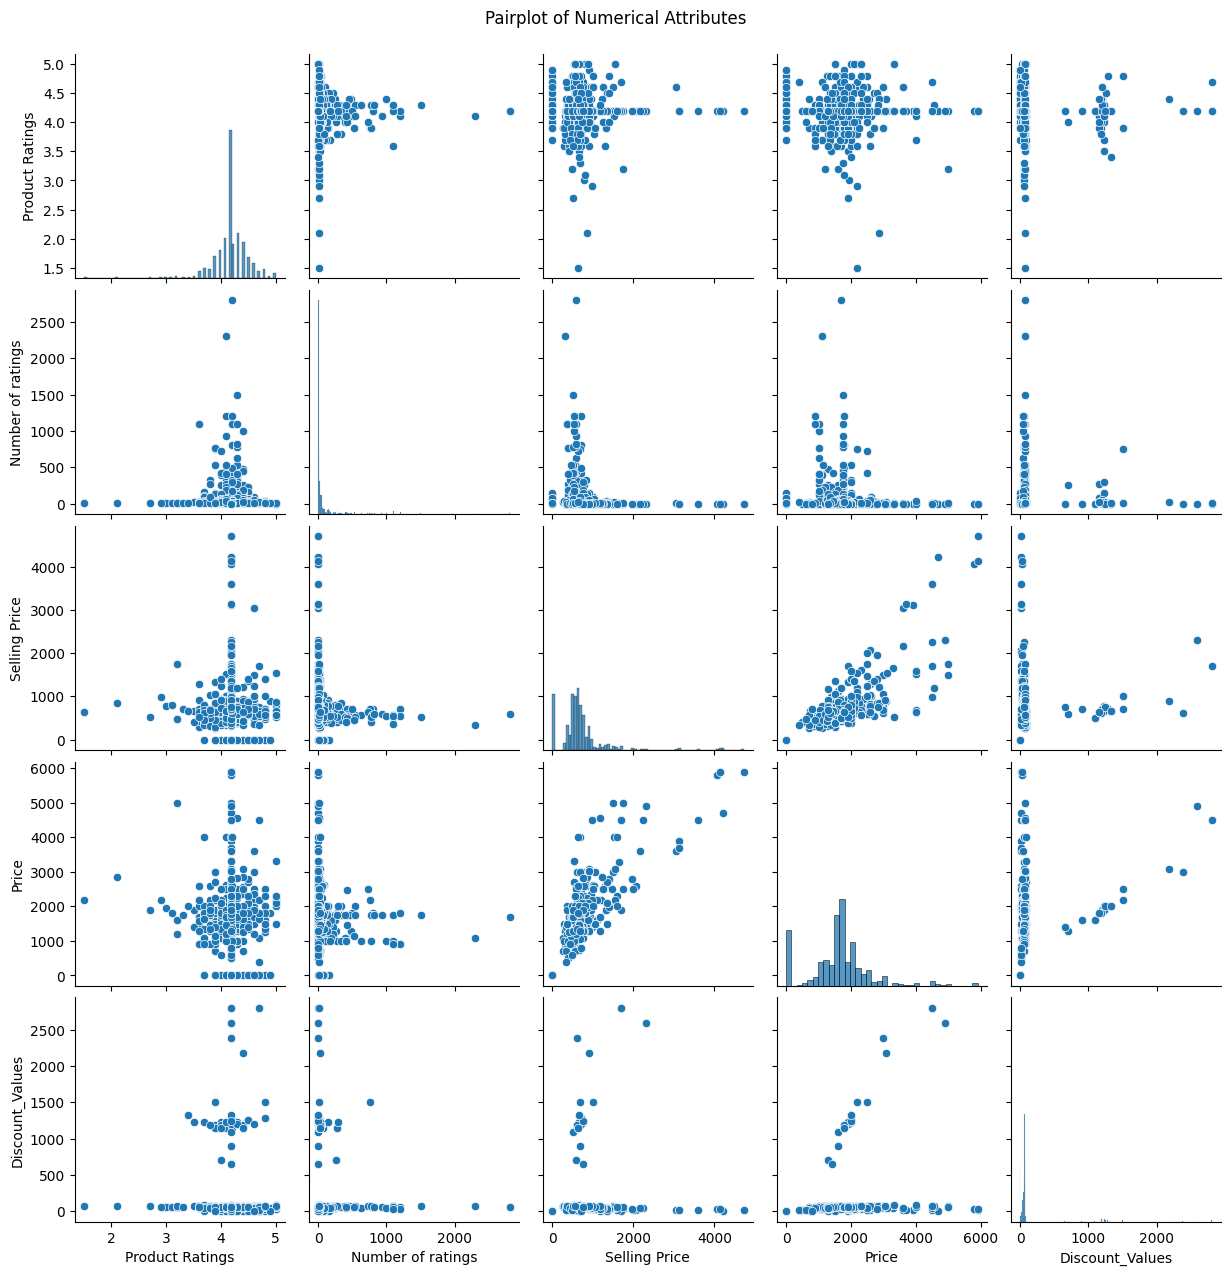

In [10]:
#Pair plot for numerical 
sns.pairplot(data[['Product Ratings', 'Number of ratings', 'Selling Price',
'Price', 'Discount_Values']])
plt.suptitle('Pairplot of Numerical Attributes', y=1.02)
plt.show()

6. Heatmap

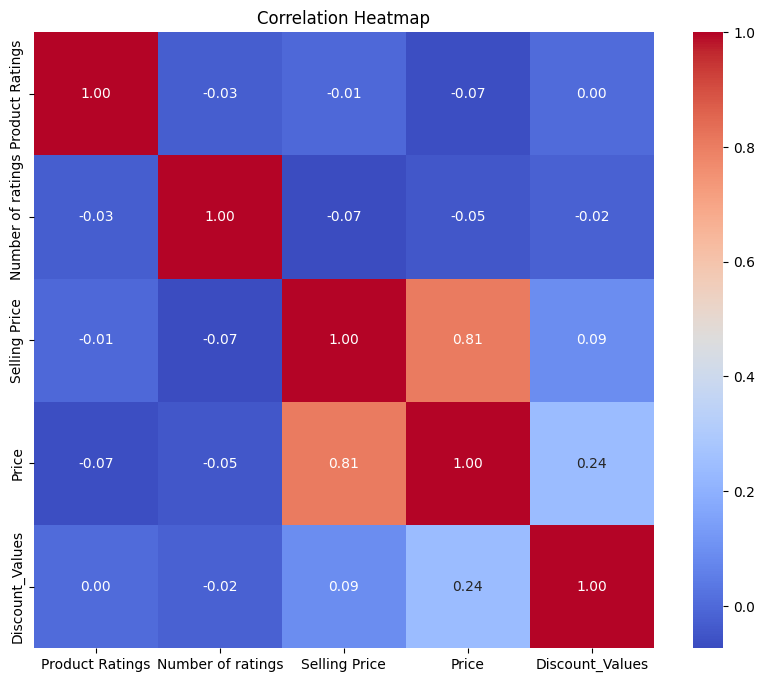

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Product Ratings', 'Number of ratings', 'Selling Price',
'Price', 'Discount_Values']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Classification


In [ ]:
#Product ratings base classification
classification = data['Product Ratings'].unique()
#print(classification)


Clustering

KNN (Offers on)

In [13]:
# BRAND NAME | Product URL | Image Path | Product Ratings | No. of Ratings | Product Info | Selling Price | Price | Discount
# Being Human | https://www.myntra.com/kurtis/beinghuman | No Image | 4.8 | 1327 | Printed Kurti | ???  | ??? | ???
#find Discount to get selling price